In [1]:
import pandas as pd
import numpy as np
import nltk
import re

#Read file of joined Yelp Business & Review data
df = pd.read_csv('joined_data_23557.csv')
df.head(5)

business_id                             name  \
0  XQfwVwDr-v0ZS3_CbbE5Xw     Turning Point of North Wales   
1  kxX2SOes4o-D3ZQBkiMRfA                            Zaika   
2  gmjsEdUsKpj9Xxu6pdjH0g       The Voodoo Bone Lady Tours   
3  gebiRewfieSdtt17PTW6Zg  Hibachi Steak House & Sushi Bar   
4  uMvVYRgGNXf5boolA9HXTw           Shalimar Fine Jewelers   

                        address           city state postal_code  \
0           1460 Bethlehem Pike    North Wales    PA       19454   
1                2481 Grant Ave   Philadelphia    PA       19114   
2  201 St Charles Ave, Ste 2560    New Orleans    LA       70170   
3                  502 State St  Santa Barbara    CA       93101   
4             250 Westshore Plz          Tampa    FL       33609   

   review_count               review_id  stars  \
0           169  KU_O5udG6zpxOg-VcAEodg    3.0   
1           181  AqPFMleE6RsU23_auESxiA    5.0   
2           359  6AxgBCNX_PNTOxmbRSwcKQ    5.0   
3           488  pUycOfUwM8vqX7KjRRhUEA    3.0   
4             8  rGQRf8UafX7OTlMNN19I8A    5.0   

                                                text  
0  If you decide to eat here, just be aware it is...  
1  Wow!  Yummy, different,  delicious.   Our favo...  
2  Loved this tour! I grabbed a groupon and the p...  
3  Had a party of 6 here for hibachi. Our waitres...  
4  My experience with Shalimar was nothing but wo...

Sentiment Analysis: https://medium.com/analytics-vidhya/sentiment-analysis-on-amazon-reviews-using-tf-idf-approach-c5ab4c36e7a1

In [2]:
df = df[['text','stars']]
df.head()

text  stars
0  If you decide to eat here, just be aware it is...    3.0
1  Wow!  Yummy, different,  delicious.   Our favo...    5.0
2  Loved this tour! I grabbed a groupon and the p...    5.0
3  Had a party of 6 here for hibachi. Our waitres...    3.0
4  My experience with Shalimar was nothing but wo...    5.0

In [3]:
df.shape

(23557, 2)

In [4]:
df=df.dropna()
df = df.reset_index(drop=True)
df.head()

text  stars
0  If you decide to eat here, just be aware it is...    3.0
1  Wow!  Yummy, different,  delicious.   Our favo...    5.0
2  Loved this tour! I grabbed a groupon and the p...    5.0
3  Had a party of 6 here for hibachi. Our waitres...    3.0
4  My experience with Shalimar was nothing but wo...    5.0

In [5]:
df.shape

(14391, 2)

In [6]:
# Label the 4 & 5 star reviews as positive ('1') and 
# label the 1 & 2 star reviews as negative ('0'). 
# Drop the 3 star reviews as they are neutral

df['stars']=df['stars'].astype(int) #convert stars column to int

df=df[df['stars']!=3] #Drop 3-star reviews
df['label']=np.where(df['stars']>=4,1,0) #1-Positive, 0-Negative

df.head()

text  stars  label
1  Wow!  Yummy, different,  delicious.   Our favo...      5      1
2  Loved this tour! I grabbed a groupon and the p...      5      1
4  My experience with Shalimar was nothing but wo...      5      1
5  Locals recommended Milktooth, and it''s an ama...      4      1
6  Love going here for happy hour or dinner!  Gre...      4      1

In [7]:
# Get the number of reviews and group by star rating
df['stars'].value_counts()

5    6785
4    3696
1    1352
2    1041
Name: stars, dtype: int64

In [8]:
df = df.sample(frac=1).reset_index(drop=True) #shuffle
data=df[df['label']==0][:2300]
data=data.append(df[df['label']==1][:10000])
data = data.reset_index(drop=True)
display(data['label'].value_counts())
data


/var/folders/q9/gjdr10ld3kd8ftt56c68jr2h0000gn/T/ipykernel_2137/668970163.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(df[df['label']==1][:10000])


1    10000
0     2300
Name: label, dtype: int64

text  stars  label
0      Let''s be honest, this place needs a face lift...      2      0
1      The service is going to be slooooww. And the f...      2      0
2      Came here during the evening. The food was med...      2      0
3      I recently went to Ame for a hair cut and wedd...      1      0
4      The car wash part is ok. The recent trend of a...      1      0
...                                                  ...    ...    ...
12295  Great place! Not a fan of the extensive use of...      4      1
12296  The setting allows you to ponder how this plac...      4      1
12297  The portion for large was really enormous! Lov...      5      1
12298  Love this store. I have to buy top quality cat...      5      1
12299  No better way to start your day.  Joel (barten...      4      1

[12300 rows x 3 columns]

Pre-Processing

In [9]:
# Convert all reviews into the lower case
data['pre_process'] = data['text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

In [10]:
# Perform the Contractions on the reviews text, eg 'it won't be' becomes 'it will not be'
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", " would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\'re", " are", s)
 s = re.sub(r"\'s", " is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\'t", " not", s)
 s = re.sub(r"\'ve", " have", s)
 s = re.sub(r"\'m", " am", s)
 return s
data['pre_process']=data['pre_process'].apply(lambda x:contractions(x))


In [11]:
# Remove non-alpha characters
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [12]:
# Remove the extra spaces between the words
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(' +', ' ', x))


In [13]:
# Remove the stop words by using the NLTK package
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [14]:
# Perform lemmatization using the wordnet lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [15]:
data

text  stars  label  \
0      Let''s be honest, this place needs a face lift...      2      0   
1      The service is going to be slooooww. And the f...      2      0   
2      Came here during the evening. The food was med...      2      0   
3      I recently went to Ame for a hair cut and wedd...      1      0   
4      The car wash part is ok. The recent trend of a...      1      0   
...                                                  ...    ...    ...   
12295  Great place! Not a fan of the extensive use of...      4      1   
12296  The setting allows you to ponder how this plac...      4      1   
12297  The portion for large was really enormous! Lov...      5      1   
12298  Love this store. I have to buy top quality cat...      5      1   
12299  No better way to start your day.  Joel (barten...      4      1   

                                             pre_process  
0      let honest place need face lift starting feel ...  
1      service going slooooww food okay come group an...  
2      came evening food mediocre best cooked meat ra...  
3      recently went ame hair cut wedding makeup tria...  
4      car wash part ok recent trend employee microma...  
...                                                  ...  
12295  great place fan extensive use straightener wou...  
12296  setting allows ponder place came trendy place ...  
12297  portion large really enormous love mix match e...  
12298  love store buy top quality cat food older cat ...  
12299  better way start day joel bartenderserver extr...  

[12300 rows x 4 columns]

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test = train_test_split(data['pre_process'], data['label'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (9225,) (9225,) Test:  ((3075,), (3075,))


In [17]:
print("TFIDF Vectorizer……")
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


In [18]:
# Implementing SVM with sklearn for classification
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [19]:
# Fitting the Training data into model
clf.fit(tf_x_train,Y_train)

LinearSVC(random_state=0)

In [20]:
# Predicting the Test data
y_test_pred=clf.predict(tf_x_test)

NameError: name 'plt' is not defined

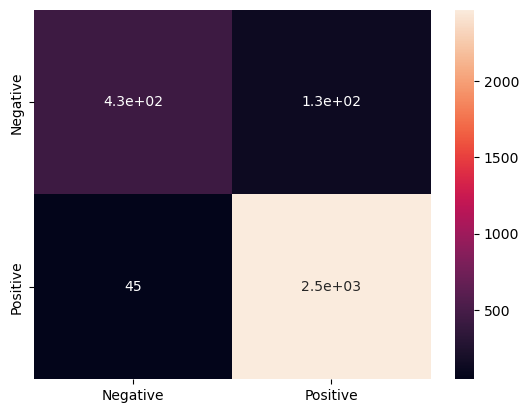

In [21]:
from sklearn import metrics
import seaborn as sns
#pred = voting.predict(x_test_tfidf)
cm=metrics.confusion_matrix(Y_test, y_test_pred)
cm = pd.DataFrame(cm, index = ["Negative", "Positive"], columns=["Negative", "Positive"])
sns.heatmap(cm, annot = True)
plt.title("Confusion Matrix for Reviews Classifier")

In [22]:
# Analyzing the results
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)
report

{'0': {'precision': 0.906054279749478,
  'recall': 0.7708703374777975,
  'f1-score': 0.8330134357005758,
  'support': 563},
 '1': {'precision': 0.9503081664098614,
  'recall': 0.9820859872611465,
  'f1-score': 0.9659357870007831,
  'support': 2512},
 'accuracy': 0.9434146341463414,
 'macro avg': {'precision': 0.9281812230796698,
  'recall': 0.876478162369472,
  'f1-score': 0.8994746113506795,
  'support': 3075},
 'weighted avg': {'precision': 0.9422057474863506,
  'recall': 0.9434146341463414,
  'f1-score': 0.9415991093480948,
  'support': 3075}}

By using the SVM Classifier we got an accuracy of 94.43%

In [23]:
# Logistic Regression is implemented using sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000, solver='saga')

In [24]:
# Fit the training data to the model
clf.fit(tf_x_train, Y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [25]:
# Predicting the test data
y_test_pred=clf.predict(tf_x_test)

In [26]:
# Analyzing the report
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_test_pred, output_dict=True)
report

{'0': {'precision': 0.9573863636363636,
  'recall': 0.5985790408525755,
  'f1-score': 0.7366120218579235,
  'support': 563},
 '1': {'precision': 0.9170033051781123,
  'recall': 0.9940286624203821,
  'f1-score': 0.95396370582617,
  'support': 2512},
 'accuracy': 0.9216260162601626,
 'macro avg': {'precision': 0.937194834407238,
  'recall': 0.7963038516364789,
  'f1-score': 0.8452878638420467,
  'support': 3075},
 'weighted avg': {'precision': 0.9243970163690052,
  'recall': 0.9216260162601626,
  'f1-score': 0.914168909704504,
  'support': 3075}}

By using the LR classifier we got an accuracy of 92.20%

In [27]:
#from sklearn.feature_extraction.text import TfidfVectorizer
text_string = [' '.join(data['pre_process'])]
text_string

['let honest place need face lift starting feel shady even feel comfortable taking small child service mediocre everything look tired comedy club feel cheerful fun feel like back hallway banquet room great parking good location though please owner please put money place really need service going slooooww food okay come group anywhere slow came group one around service still mess multiple server around watched one server struggle felt bad making drink serving running food came evening food mediocre best cooked meat ran every side food basically service god awful walk ask service waiter kept messing order took long everything drink food come waiter even messed payment know place many star bribery recently went ame hair cut wedding makeup trial run salon look lovely would much pleasing receptionist smiled offered welcome neither given though hairdresser polite genuine friendliness cut turned ok jaw dropping harsh cut mentioned want cut short would like keep long wedding october asked anyt

In [28]:
from wordcloud import STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
import re

#text_string = re.sub('[^a-zA-Z]', '', str(text_string))
#print(text_string)

stop_words = ["went", "really", "go", "going", "place", "day", "night", "one", "alway", "say", "make", "review", "got", "took", "around", "much", "came"] + list(STOPWORDS)
text = WordCloud(stopwords = stop_words, min_word_length =4, background_color='white').generate(data['pre_process'].to_string())

Create a Word Cloud https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f; https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

(-0.5, 399.5, 199.5, -0.5)

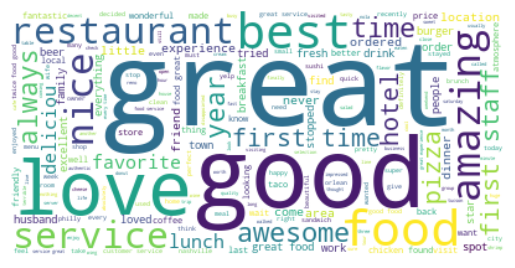

In [29]:

plt.imshow(text, interpolation='bilinear')
plt.axis("off")

In [ ]:
# neg_reviews = data.loc[data['pre_process']]---- value 0, 
# pos_reviews = and another one for value 1

In [33]:
pos_reviews = data.loc[(data['label'] >= 1)]
pos_reviews.head()

text  stars  label  \
2300  This is my all time favorite boutique in Nashv...      5      1   
2301  OMG I am so excited! Every hibachi place in Ta...      5      1   
2302  Definitely a good go to burger place. The chic...      5      1   
2303  I''m sorry if you''re offended and I can see y...      5      1   
2304  Nice wines and great location. Too bad they do...      4      1   

                                            pre_process  
2300  time favorite boutique nashville always find o...  
2301  omg excited every hibachi place tampa like sta...  
2302  definitely good go burger place chicken stew c...  
2303  sorry offended see point damn good cheesesteak...  
2304  nice wine great location bad food bring food e...

In [35]:
neg_reviews = data.loc[(data['label'] == 0)]
neg_reviews.head()

text  stars  label  \
0  Let''s be honest, this place needs a face lift...      2      0   
1  The service is going to be slooooww. And the f...      2      0   
2  Came here during the evening. The food was med...      2      0   
3  I recently went to Ame for a hair cut and wedd...      1      0   
4  The car wash part is ok. The recent trend of a...      1      0   

                                         pre_process  
0  let honest place need face lift starting feel ...  
1  service going slooooww food okay come group an...  
2  came evening food mediocre best cooked meat ra...  
3  recently went ame hair cut wedding makeup tria...  
4  car wash part ok recent trend employee microma...

In [40]:
pos_text_string = [' '.join(pos_reviews['pre_process'])]
pos_text_string

['time favorite boutique nashville always find one kind shoe deal ask john bowyer visit store patient helpful omg excited every hibachi place tampa like star hubby excited pay soso meal found kuchi plaza million time never seen place brand spanking new staff friendly seriously hostess waitress smile chef hilarious kind awesome hibachi chef thing like shooting sake mouth shooting zucchini mouth volcano peeing boy eggroll lol every hibachi place shooting sake one pretty rare sushi delicious soupsalad great loved steakshrimpchicken even owner came say hello make joke hand tired massaging beef lol nothing negative say everything wonderful definitely back definitely good go burger place chicken stew currently though omfg yum sorry offended see point damn good cheesesteak thought place little detail love place let try focus sandwich go menu pretty tight get steak whiz thank god pizza steak steak hoagie etc listed although serve hoagy maybe asked nicely could get one thing next thing know dis

In [66]:
pd.options.display.max_colwidth = 10000 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

L = pos_text_string

#create new df 
pos_df = pd.DataFrame({'col':pos_text_string})
print (pos_df)

(-0.5, 399.5, 199.5, -0.5)

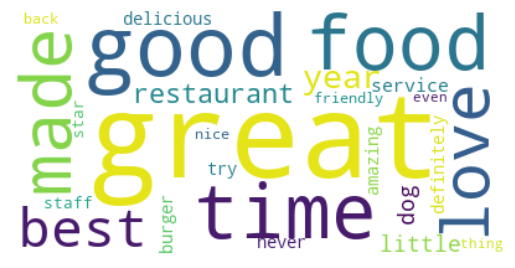

In [67]:

stop_words = ["went", "really", "go", "going", "place", "day", "night", "one", "alway", "say", "make", "review", "got", "took", "around", "much", "came"] + list(STOPWORDS)
text = WordCloud(max_words=25, stopwords = stop_words, min_word_length =3, background_color='white').generate(pos_df['col'].to_string())
plt.imshow(text, interpolation='bilinear')
plt.axis("off")


In [44]:
neg_text_string = [' '.join(neg_reviews['pre_process'])]
neg_text_string

['let honest place need face lift starting feel shady even feel comfortable taking small child service mediocre everything look tired comedy club feel cheerful fun feel like back hallway banquet room great parking good location though please owner please put money place really need service going slooooww food okay come group anywhere slow came group one around service still mess multiple server around watched one server struggle felt bad making drink serving running food came evening food mediocre best cooked meat ran every side food basically service god awful walk ask service waiter kept messing order took long everything drink food come waiter even messed payment know place many star bribery recently went ame hair cut wedding makeup trial run salon look lovely would much pleasing receptionist smiled offered welcome neither given though hairdresser polite genuine friendliness cut turned ok jaw dropping harsh cut mentioned want cut short would like keep long wedding october asked anyt

In [64]:
pd.options.display.max_colwidth = 10000 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

N = neg_text_string

#create new df 
neg_df = pd.DataFrame({'col':neg_text_string})
neg_df

col
0  let honest place need face lift starting feel shady even feel comfortable taking small child service mediocre everything look tired comedy club feel cheerful fun feel like back hallway banquet room great parking good location though please owner please put money place really need service going slooooww food okay come group anywhere slow came group one around service still mess multiple server around watched one server struggle felt bad making drink serving running food came evening food mediocre best cooked meat ran every side food basically service god awful walk ask service waiter kept messing order took long everything drink food come waiter even messed payment know place many star bribery recently went ame hair cut wedding makeup trial run salon look lovely would much pleasing receptionist smiled offered welcome neither given though hairdresser polite genuine friendliness cut turned ok jaw dropping harsh cut mentioned want cut short would like keep long wedding october asked anything looking replied trim unless suggestion suggestion usually mark characteristic hairdresser either creative enjoy job let go though thought would wait till hair dried making final judgment blow horrible even could done better job usually love blow out get hair cut hair smooth full body hair flat boring considered hair wedding decided decent blow dry probably cut completed took front check told receptionist appointment make said oh well see anyone want make appointment another day scheduled appointment confirmed wanted told problem assumed booked even told woman booking appointment live state weekend rebook appointment ame fearing would make three hour trek told isorry make book worth visit unfriendly staff poor service unreliable scheduling make salon worst ever visited finding another salon move pa final car wash part ok recent trend employee micromanaging lane go pay assisting paying annoying deal breaker day took husband work suv followed free vacuum employee came attitude telling husband needed clean stating job description come work making mess etc etc see first photo posted mess made pulled protective carpet back dirt landscaping truck made black top way laid vacuumed came broom dustpan telling u going sweep rude exchange word part asked speak manager replied already told saw told come said go get perhaps guy problem gender differentiation likely lying teeth sent male manager back asked want know keep cean lot expensive car come like keep clean shuck guess year old trailblazer work truck must par accommodating asked speak owner contact information owner sudden wanted know complaint could help informed u could call back tomorrow speak justin handle complaint parking lot filthy obviously rarely ever swept cared one piece trash none earth debris sort u around u mess trash ground lot one person verbally reprimanded strange power trip never excuse employee cause scene drag far bring dustpan brush demanding standing watching waiting customer sweep dirt pavement bunch friend used work car wash buck sick none stop winter due soaking wet cold guy easy apparently way much free time hand owner got saving hour labor make sure employee handle customer service appropriately others complain scorned dissatisfied result wanting go free take ten cent loss keep customer happy id bet anything small bit dirt still one ever saw inconvenience begin went brunch today unfortunately person assigned omelet station idea cook sooooooo slow overcooked every omelet could handle two burner station restaurant rated family went new area heard great thing packed hardly parking always make reservation thought would happy food however went dinner menu food sounded good husband struggled find something liked get california roll good impressed teriyaki chicken seems like experience one personally going back conflicted driver sweet polite pizza delicious barely warm second time happened hope fix try somewhere else yummy staff refused make frappacino ordered least three ti

In [1]:
stop_words = ["went", "really", "go", "going", "place", "day", "night", "one", "alway", "say", "make", "review", "got", "took", "around", "much", "came"] + list(STOPWORDS)
text = WordCloud(max_words=75, stopwords = stop_words, min_word_length =3, background_color='white').generate(neg_df['col'].to_string())
plt.imshow(text, interpolation='bilinear')
plt.figure
plt.axis("off")

NameError: name 'STOPWORDS' is not defined

In [69]:
neg_df['col'].value_counts()

let honest place need face lift starting feel shady even feel comfortable taking small child service mediocre everything look tired comedy club feel cheerful fun feel like back hallway banquet room great parking good location though please owner please put money place really need service going slooooww food okay come group anywhere slow came group one around service still mess multiple server around watched one server struggle felt bad making drink serving running food came evening food mediocre best cooked meat ran every side food basically service god awful walk ask service waiter kept messing order took long everything drink food come waiter even messed payment know place many star bribery recently went ame hair cut wedding makeup trial run salon look lovely would much pleasing receptionist smiled offered welcome neither given though hairdresser polite genuine friendliness cut turned ok jaw dropping harsh cut mentioned want cut short would like keep long wedding october asked anythi

In [74]:
# https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python
# https://stackoverflow.com/questions/57826063/how-to-create-a-wordcloud-according-to-frequencies-in-a-pandas-dataframe
# Looking up how to create a wordcloud based on word frequency
d = {}
for a, x in neg_df.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


ValueError: not enough values to unpack (expected 2, got 1)

[('place', 1079), ('food', 1026), ('one', 857), ('time', 637), ('order', 584)]
[('place', 1.0), ('food', 0.9508804448563485), ('one', 0.794253938832252), ('time', 0.5903614457831325), ('order', 0.541241890639481)]


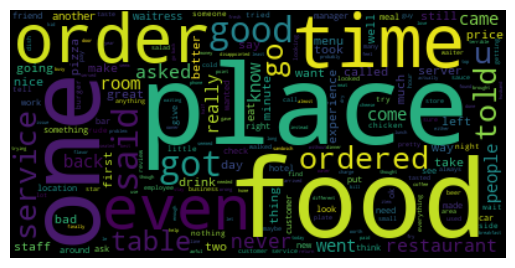

In [81]:
# Look at an article to figure out word frequency: https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

# create a dictionary of word frequencies
text = ' '.join(neg_text_string) # create string out of a list
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
# 
#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()